In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
l_x = 100
dx = 1e-3
dt = 1e-4
V = np.zeros(l_x)
psi_0 = np.sin(np.arange(l_x)*(np.pi/l_x))


In [29]:
def tridiagonal_matrix(on_diag, off_diag):
    """Fills and returns a wrap-around tridiagonal matrix.
    
    Parameters
    ----------
    on_diag: array-like, shape of (l_x)
        Elements on the diagonal.
    
    off_diag : array-like, shape of (l_x)
        Elements off the diagonal.
    
    Returns
    -------
    M : array-like, shape of (l_x, l_x)
        Tridiagonal matrix with elements filled in.
    """
    l_x = len(on_diag)
    M = np.zeros((l_x, l_x), dtype='complex128')
    ind_j = np.arange(l_x)
    ind_i, ind_k = (ind_j-1)%l_x, (ind_j+1)%l_x
    M[(ind_j, ind_j)] = on_diag
    M[(ind_j, ind_k)] = off_diag
    M[(ind_j, ind_i)] = off_diag
    return M

In [30]:
def finite_diff(V, dx, dt):
    """Runs finite difference algorithm to compute the linear system to solve.
    
    Parameters
    ----------
    V : array-like, shape of (l_x)
        Potential at each location x.
    
    dx : float
        Increments of space to simulate at.
    
    dt : float
        Increments of time to simulate at.
    
    Returns
    -------
    M : array-like, shape of (2, l_x, l_x)
        Tridiagonal matrix representing the linear equations to solve.
        The first matrix is the LHS, and the second is the RHS (which is None).
    """
    l_x = V.shape[0]
    t_i = -dt/1j
    v_jj = [((1/dx)**2 + V[j] - 1j/dt)*t_i for j in range(l_x)]
    v_jk = (-1/(2*dx**2)*t_i) * np.ones(l_x)
    return [tridiagonal_matrix(v_jj, v_jk), None]

In [31]:
def crank_nicholson(V, dx, dt):
    """Runs Crank-Nicholson algorithm to compute the linear system to solve.
    
    Parameters
    ----------
    V : array-like, shape of (l_x)
        Potential at each location x.
    
    dx : float
        Increments of space to simulate at.
    
    dt : float
        Increments of time to simulate at.
    
    Returns
    -------
    M : array-like, shape of (2, l_x, l_x)
        Tridiagonal matrix representing the linear equations to solve.
        The first matrix is the LHS and the second is the RHS.
    """
    
    l_x = V.shape[0]
    t_i = dt*1j
    vl_jj = [1 + t_i/dx**2 + V[j]*t_i/2 for j in range(l_x)]
    vl_jk = (-t_i/(2*dx**2)) * np.ones(l_x)
    vr_jj = [1 - t_i/dx**2 - V[j]*t_i/2 for j in range(l_x)]
    vr_jk = (t_i/(2*dx**2)) * np.ones(l_x)
    return [tridiagonal_matrix(vl_jj, vl_jk), tridiagonal_matrix(vr_jj, vr_jk)]


In [37]:
def tdse_step(M, psi_0, method='CN'):
    """Runs one step of the Time-Dependent Schrodinger Equation (TDSE).
    
    Parameters
    ----------
    M : array-like, shape of (, l_x, l_x)
        LHS and RHS of linear system of equations to solve.
    
    psi_0 : array-like, shape of (l_x)
        Value of wave function at current time step, RHS of linear system.
    
    Returns
    -------
    psi_1 : array-like, shape of (l_x)
        Value of wave function at next time step, solution to the linear system.
    """
    psi = np.dot(M[1], psi_0) if method == 'CN' else psi_0
    return np.linalg.solve(M[0], psi)


def plot_psi(psi, title):
    """Plots a single value of the wave function.
    
    Parameters
    ----------
    psi: array-like, shape of (l_x)
        Wave function.
    
    Returns
    -------
    fig, ax: Matplotlib object
        Plot of the real and imaginary parts.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.set_title(title)
    ax.plot(range(len(psi)), psi.real, label='Real')
    ax.plot(range(len(psi)), psi.imag, label='Imaginary')
    ax.plot(range(len(psi)), np.abs(psi), label='Magnitude')
    ax.legend(loc='upper right')
    return fig, ax



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe7b97f6e80>)

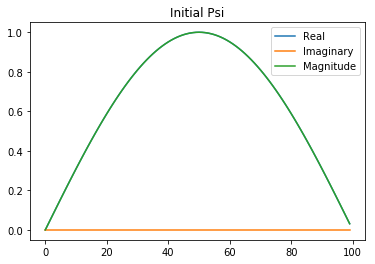

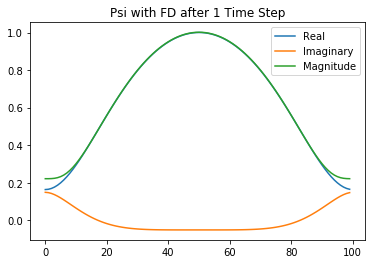

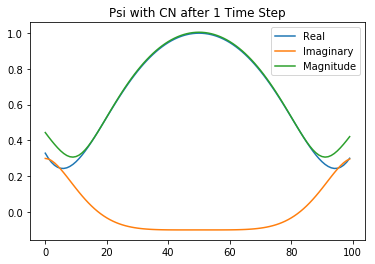

In [38]:
M_FD = finite_diff(V, dx, dt)
M_CN = crank_nicholson(V, dx, dt)
psi_fd = tdse_step(M_FD, psi_0, method='FD')
psi_cn =  tdse_step(M_CN, psi_0, method='CN')
plot_psi(psi_0, title='Initial Psi')
plot_psi(psi_fd, title='Psi with FD after 1 Time Step')
plot_psi(psi_cn, title='Psi with CN after 1 Time Step')